In [1]:
import numpy as np
import sacpy as scp
import matplotlib.pyplot as plt

In [2]:
# load sst
sst = scp.load_sst()['sst']
sst

<xarray.DataArray 'sst' (time: 376, lat: 56, lon: 180)>
[3790080 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1991-01-16T12:00:00 ... 2022-04-16T12:00:00
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float64 -55.0 -53.0 -51.0 -49.0 -47.0 ... 49.0 51.0 53.0 55.0

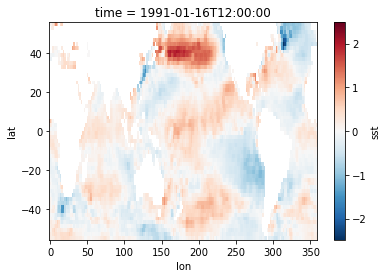

In [3]:
# get ssta
ssta = scp.get_anom(sst,method=1)
ssta[0].plot()

In [4]:
# calculate Nino3.4
Nino34 = ssta.loc[:,-5:5,190:240].mean(axis=(1,2))

In [5]:
IODW = ssta.loc[:,-10:10,50:70].mean(axis=(1,2))
IODE = ssta.loc[:,-10:0,90:110].mean(axis=(1,2))
IODI = +IODW - IODE

In [6]:
X = np.vstack([np.array(Nino34),np.array(IODI)]).T
# multiple linear regression
MLR = scp.MultLinReg(X,np.array(ssta))

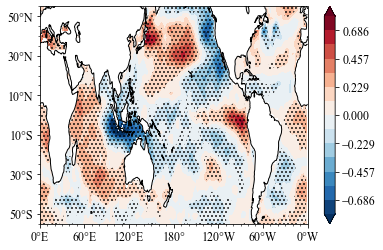

In [7]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.ticker import MultipleLocator
import cartopy.crs as ccrs
plt.rc('font', family='Times New Roman', size=12)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
m = ax.contourf(ssta.lon,
                ssta.lat,
                MLR.slope[1],
                cmap="RdBu_r",
                levels=np.linspace(-0.8, 0.8, 15),
                extend="both",
                transform=ccrs.PlateCarree())
n = plt.contourf(ssta.lon,
                 ssta.lat,
                 MLR.pv_i[1],
                 levels=[0, 0.1, 1],
                 zorder=1,
                 hatches=['...', None],
                 colors="None",
                 transform=ccrs.PlateCarree())
xtk = np.arange(-180,181,60)
ax.set_xticks(xtk)
# ax.set_xticks(xtk,crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-50,51,20),crs=ccrs.PlateCarree())
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.coastlines()
ax.set_aspect("auto")
plt.colorbar(m)
plt.savefig("../pic/MLR.png",dpi=200)